# LV-EZ1とHC-SR04のセンサの精度の比較

実際に二つのセンサによる精度の違いを可視化する．

そのために，0.2秒ごとにセンサの値を取得，距離のデータを100個取得し，その間の値をグラフによって出力する．

また，距離の平均も算出し，どちらが値にバラツキが少ないかを比較する．

### 計測方法

計測方法については，ラジコンの側面にセンサを二つ搭載できることを利用し，HC-SR04とLV-EZ1を一緒に並べて計測をする．

また，壁からは約110cm離れており，どちらも100回計測した後にグラフを描画，そして平均値を算出するという手法を使用し，

どれだけ外れ値が出るか，どれほど信頼できる値が取得可能かを検証した．

## HC-SR04について

プログラムは流用．すこし手直しを加え，100回繰り返し，グラフを描画する処理を追加．

Measured Distance = 86.3 cm
Measured Distance = 38.1 cm
Measured Distance = 111.2 cm
Measured Distance = 110.8 cm
Measured Distance = 111.2 cm
Measured Distance = 72.1 cm
Measured Distance = 110.7 cm
Measured Distance = 110.8 cm
Measured Distance = 110.8 cm
Measured Distance = 32.8 cm
Measured Distance = 111.2 cm
Measured Distance = 110.7 cm
Measured Distance = 111.2 cm
Measured Distance = 33.1 cm
Measured Distance = 110.8 cm
Measured Distance = 110.4 cm
Measured Distance = 110.7 cm
Measured Distance = 108.7 cm
Measured Distance = 111.6 cm
Measured Distance = 110.3 cm
Measured Distance = 110.7 cm
Measured Distance = 45.2 cm
Measured Distance = 111.1 cm
Measured Distance = 111.2 cm
Measured Distance = 110.7 cm
Measured Distance = 29.9 cm
Measured Distance = 110.7 cm
Measured Distance = 109.9 cm
Measured Distance = 110.3 cm
Measured Distance = 27.7 cm
Measured Distance = 110.7 cm
Measured Distance = 111.5 cm
Measured Distance = 110.7 cm
Measured Distance = 34.4 cm
Measured Distance = 110

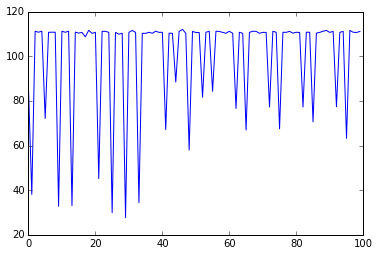

Average of distance 99.9640052319
Measurement stopped 


In [20]:
#Libraries
import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

d_list = []
 
#GPIO Mode (BOARD / BCM)
GPIO.setmode(GPIO.BCM)
 
#set GPIO Pins
GPIO_TRIGGER = 13
GPIO_ECHO = 6
 
#set GPIO direction (IN / OUT)
GPIO.setup(GPIO_TRIGGER, GPIO.OUT)
GPIO.setup(GPIO_ECHO, GPIO.IN)
 
def distance():
    # set Trigger to HIGH
    GPIO.output(GPIO_TRIGGER, True)
 
    # set Trigger after 0.01ms to LOW
    time.sleep(0.00001)
    GPIO.output(GPIO_TRIGGER, False)
 
    StartTime = time.time()
    StopTime = time.time()
 
    # save StartTime
    while GPIO.input(GPIO_ECHO) == 0:
        StartTime = time.time()
 
    # save time of arrival
    while GPIO.input(GPIO_ECHO) == 1:
        StopTime = time.time()
 
    # time difference between start and arrival
    TimeElapsed = StopTime - StartTime
    # multiply with the sonic speed (34300 cm/s)
    # and divide by 2, because there and back
    distance = (TimeElapsed * 34300) / 2
 
    return distance
 
if __name__ == '__main__':  
    
    sumofdist = 0
    
    for a in range(100):
        dist1 = distance()
        sumofdist += dist1
        d_list.append(dist1)
        print ("Measured Distance = %.1f cm" % dist1)
        time.sleep(0.2)

    avedist = sumofdist / (a+1)
    plt.plot(d_list)
    plt.show()
    print('Average of distance {}'.format(avedist))
    print("Measurement stopped ")
    GPIO.cleanup()

実際に動かしたものが以下の画像，平均値は99.9640052319cm，ある程度は精度があるようだが，外れ値の割合が多すぎる，これを実際に使うとなるとまともに使うということは難しそうである．
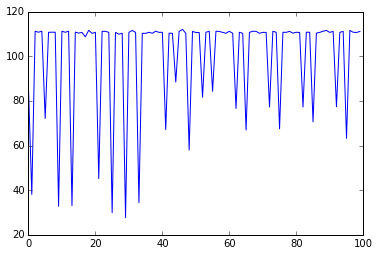

Ultrasonic Measurement
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.4 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.4 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 203.3 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.4 cm
  Distance : 109.5 cm
  Distance : 109.6 cm
  Distance : 109.5 cm
  Distance : 109.6 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distance : 109.5 cm
  Distanc

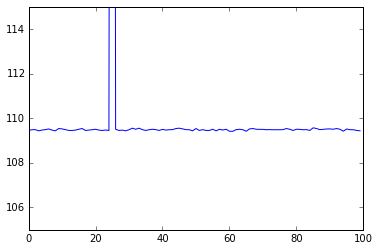

Average of distance 110.424297214


In [24]:
import time
import RPi.GPIO as GPIO
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Use BCM GPIO references
# instead of physical pin numbers
GPIO.setmode(GPIO.BCM)

# Define GPIO to use on Pi
GPIO_TRIGECHO = 19

print "Ultrasonic Measurement"

# Set pins as output and input
GPIO.setup(GPIO_TRIGECHO,GPIO.OUT)  # Initial state as output


# Set trigger to False (Low)
GPIO.output(GPIO_TRIGECHO, False)

dist2_list = []

def measure():
  # This function measures a distance
  # Pulse the trigger/echo line to initiate a measurement
    GPIO.output(GPIO_TRIGECHO, True)
    time.sleep(0.00001)
    GPIO.output(GPIO_TRIGECHO, False)
  #ensure start time is set in case of very quick return
    start = time.time()

  # set line to input to check for start of echo response
    GPIO.setup(GPIO_TRIGECHO, GPIO.IN)
    while GPIO.input(GPIO_TRIGECHO)==0:
        start = time.time()

  # Wait for end of echo response
    while GPIO.input(GPIO_TRIGECHO)==1:
        stop = time.time()
  
    GPIO.setup(GPIO_TRIGECHO, GPIO.OUT)
    GPIO.output(GPIO_TRIGECHO, False)

    elapsed = stop-start
    distance = (elapsed * 34300)/2.0
    time.sleep(0.1)
    return distance

if __name__ == '__main__':  

    sumofdist = 0
    for b in range(100):
        distance = measure()
        sumofdist += distance
        dist2_list.append(distance)
        print "  Distance : %.1f cm" % distance
        time.sleep(0.2)

    print("Stop")
    avedist2 = sumofdist / (b+1)
    plt.ylim([105,115])
    plt.plot(dist2_list)
    plt.show()
    print('Average of distance {}'.format(avedist2))
    GPIO.cleanup()

LV-EZ1で動かしたのは下のような結果，外れ値は１回ほどしか出ない．これならばある程度はコードの方で弾くことが可能である．
平均値は外れ値をん族と109.5cmほどと，誤差は少なく，100cmと同じようになった．値がバラバラにならないのでこちらの方がある程度は信頼が持てる結果になっている．

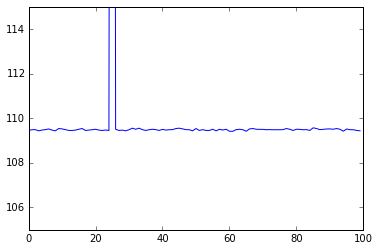